In [131]:
import matplotlib.pyplot as plt
import pandas as pd
scores=pd.read_csv("StudentsPerformance.csv")
scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


I chose this dataset because there were multiple potential useful data visualizations, in addition to the dataset itself not requiring much cleaning/manipulating. 
Link to dataset:
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/ 

I did not need to do much cleaning of this dataset since the columns did not contain NaN values nor is there any variation in the syntax/spelling of strings. I did change the PLE keys in order to have them fit the charts in a more organized manner. 

Research Questions
What is the distribution of test takers by PLE (parental level of education)?
How does PLE affect the distribution and variation of test scores by subject?
How much does test preparation affect the distribution of test scores by subject?

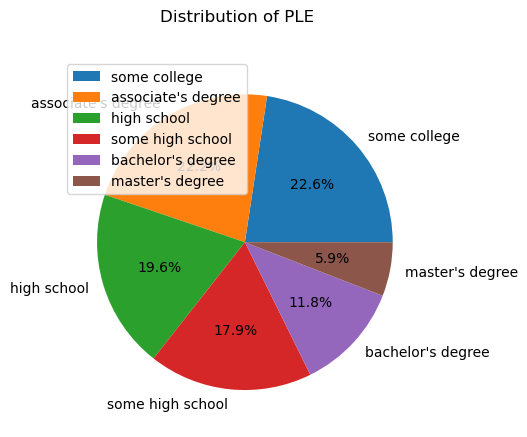

In [132]:
#Percentage of test takers with given type of PLE
mf=scores["parental level of education"]
counted=mf.value_counts()
colors=["Magenta", "Blue", "green", "orange", 'red', "yellow"]
labels="associate's degree", "bachelor's degree", "high school", "master's degree", "some college", "some high school"

ax=counted.plot(kind="pie", legend=True, title='Distribution of PLE', ylabel='', labeldistance=1.1, autopct="%1.1f%%", 
               subplots=True)

plt.show()


The above pie chart shows the distribution of PLE, each type is accompanied by the percentage. The smallest group of test takers have a PLE of a master's degree, and the largest has a PLE of some college. 

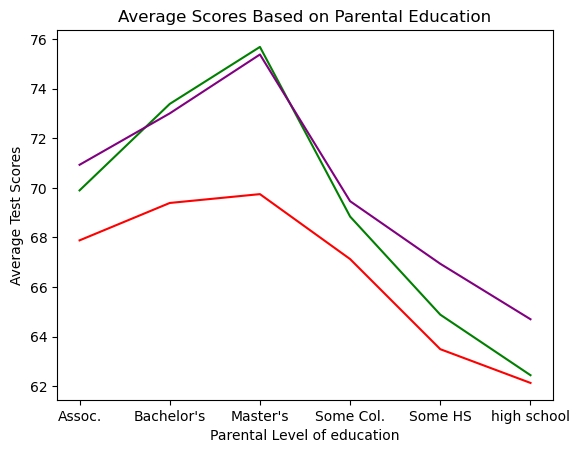

In [134]:
#Comparison of PLE by subject of test
df1=df.copy()
df1.replace('some high school', "Some HS", inplace=True)
df1.replace('some college', "Some Col.", inplace=True)
df1.replace("bachelor's degree", "Bachelor's", inplace=True)
df1.replace("master's degree", "Master's", inplace=True)
df1.replace("associate's degree", "Assoc.", inplace=True)
#Renaming the column strings to fit the chart

avgwrit=df1.groupby("parental level of education")[["writing score"]].mean()
avgread=df1.groupby("parental level of education")[["reading score"]].mean()
avgmath=df1.groupby("parental level of education")[["math score"]].mean()
#obtains the average value of test scores for each subject 

fig,ax=plt.subplots()
ax.plot(avgwrit, "green")#green line represents writing score
ax.plot(avgread, "purple")#purple line represents reading score
ax.plot(avgmath, "red")#red line represents math score
plt.xlabel("Parental Level of education")
plt.ylabel("Average Test Scores")
plt.title("Average Scores Based on Parental Education")
plt.show()

The above line chart shows the trends of mean test scores based on PLE. The greatest mean score was from those with a PLE of master's degree, and the lowest was from a PLE of a high school diploma. Math was the subject with the lowest mean score throughout the entire dataset, while reading and writing had more uniform trends.

Text(0.5, 0, 'Reading Score')

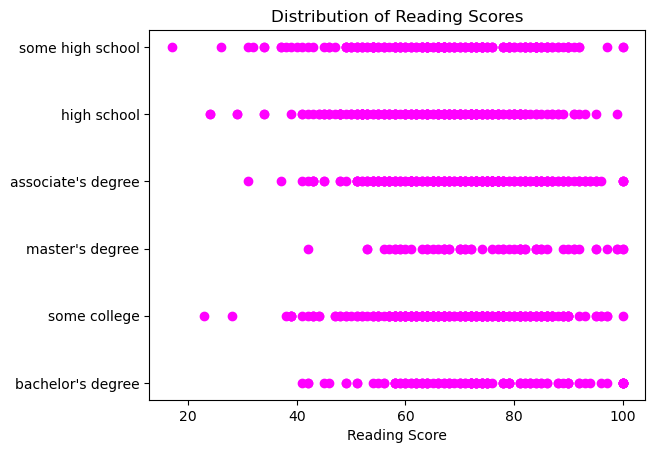

In [135]:
read=scores["reading score"]#scatter of test scores from individual subject(reading)
ed=scores["parental level of education"]
plt.scatter(read, ed, color="magenta")
plt.title("Distribution of Reading Scores")
plt.xlabel("Reading Score")

Text(0.5, 0, 'Math Score')

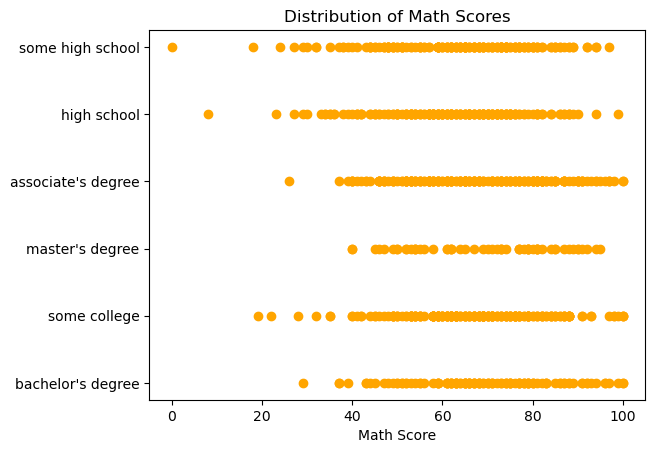

In [136]:
math=scores["math score"]#scatter of test scores from individual subject(math)
ed=scores["parental level of education"]
plt.scatter(math, ed, color="orange")
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")

Text(0.5, 0, 'Writing Score')

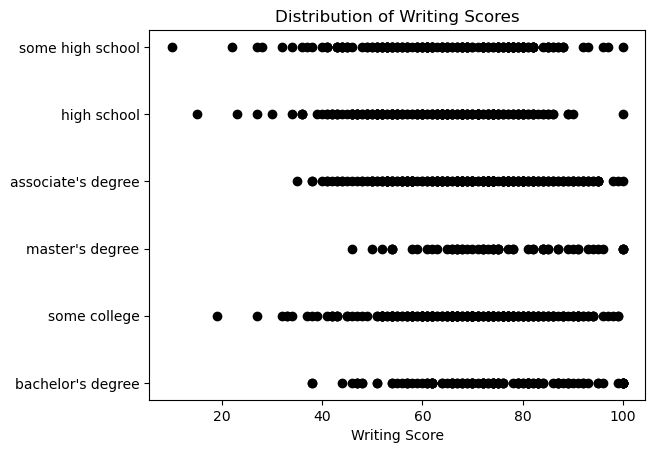

In [140]:
math=scores["writing score"] #scatter of test scores from individual subject(writing)
ed=scores["parental level of education"]
plt.scatter(math, ed, color="black")
plt.title("Distribution of Writing Scores")
plt.xlabel("Writing Score")

Text(0, 0.5, 'PLE')

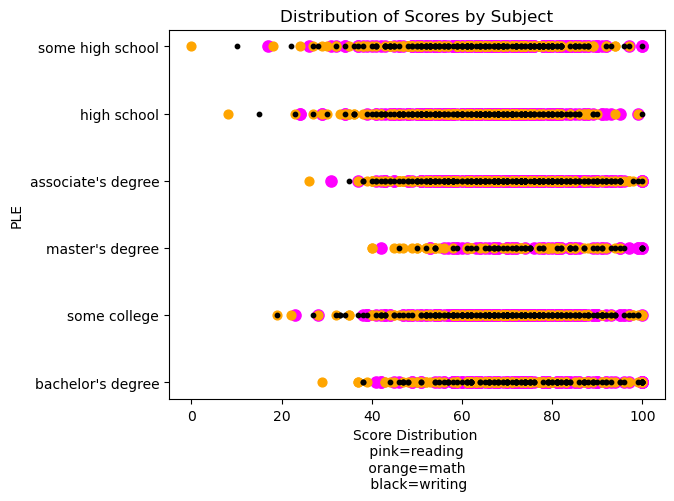

In [138]:
#Showing the score distribution of all 3 subjects, based on PLE.
read=scores["reading score"]
ed=scores["parental level of education"]
plt.scatter(read, ed, s=65, color="magenta")#This makes the reading scatter dots the largest
math=scores["math score"]
plt.scatter(math, ed, s=40, color="orange")#Medium sized dots (Math score)
write=scores["writing score"]
plt.scatter(write, ed, s=10, color="black")#Smallest dots (Writing score)
plt.title("Distribution of Scores by Subject")
plt.xlabel("Score Distribution \n pink=reading \n orange=math \n black=writing")
plt.ylabel("PLE")



The above graph shows the distribution of individual scores in the dataset, broken down by PLE. The sizes of the dots are varied in order to decipher their placement. The horizontal lines made up by the dots refer to the PLE. Since there were less people with a PLE of master's, it had the least score variation and less outliers below 50%, meanwhile those with PLE of some high school saw the greatest variation. Additionally, the subject that saw the most variation was math, as there are several outliers between 0 and 40%. 

Text(0, 0.5, 'Score')

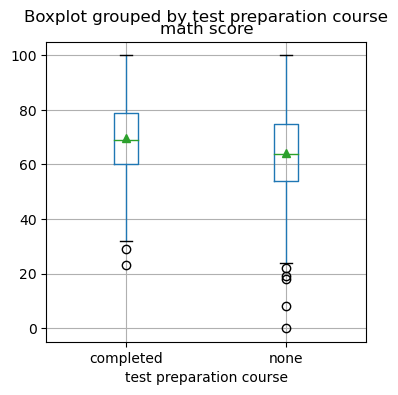

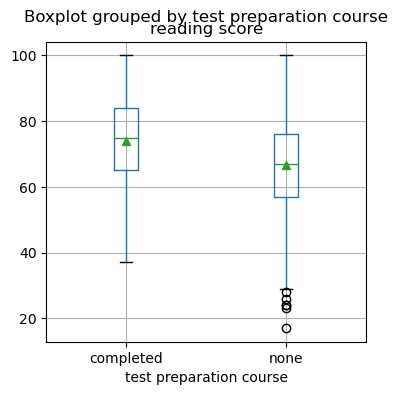

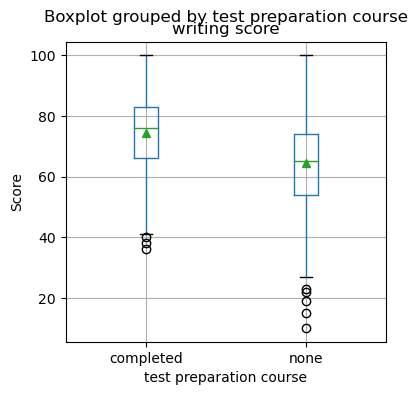

In [139]:
#Score distribution based on test preparation
prep=scores["test preparation course"]
ax=scores.boxplot(column="math score", by="test preparation course",figsize=(4,4),
                 showmeans=True)
ax=scores.boxplot(column="reading score", by="test preparation course",figsize=(4,4),
                 showmeans=True)
ax=scores.boxplot(column="writing score", by="test preparation course",figsize=(4,4),
                 showmeans=True)
#Creating 3 separate boxplots showing IQR, median and mean score, and outliers 
ax.set_ylabel("Score")


The above box plots indicate the interquartile ranges of test takers who completed a preparation course prior. Each graph covers this data based on each subject. The greatest range was found from the math scores from those who did not complete a course. Mean scores for those who prepared were in the 70s for all subjects, meanwhile those who did not prepare saw mean scores in the 60s.  